In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [18]:
df = pd.read_csv('For_EDA.csv')

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117741 entries, 0 to 117740
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   phase              117741 non-null  object 
 1   condition          117741 non-null  object 
 2   intervention_type  117741 non-null  object 
 3   study_design       117741 non-null  object 
 4   sponsor_type       117741 non-null  object 
 5   enrollment         117741 non-null  float64
 6   enrollment_type    112711 non-null  object 
 7   status             117741 non-null  object 
 8   gender             117741 non-null  object 
 9   location           117741 non-null  object 
 10  masking            117741 non-null  object 
 11  duration           117741 non-null  float64
dtypes: float64(2), object(10)
memory usage: 10.8+ MB


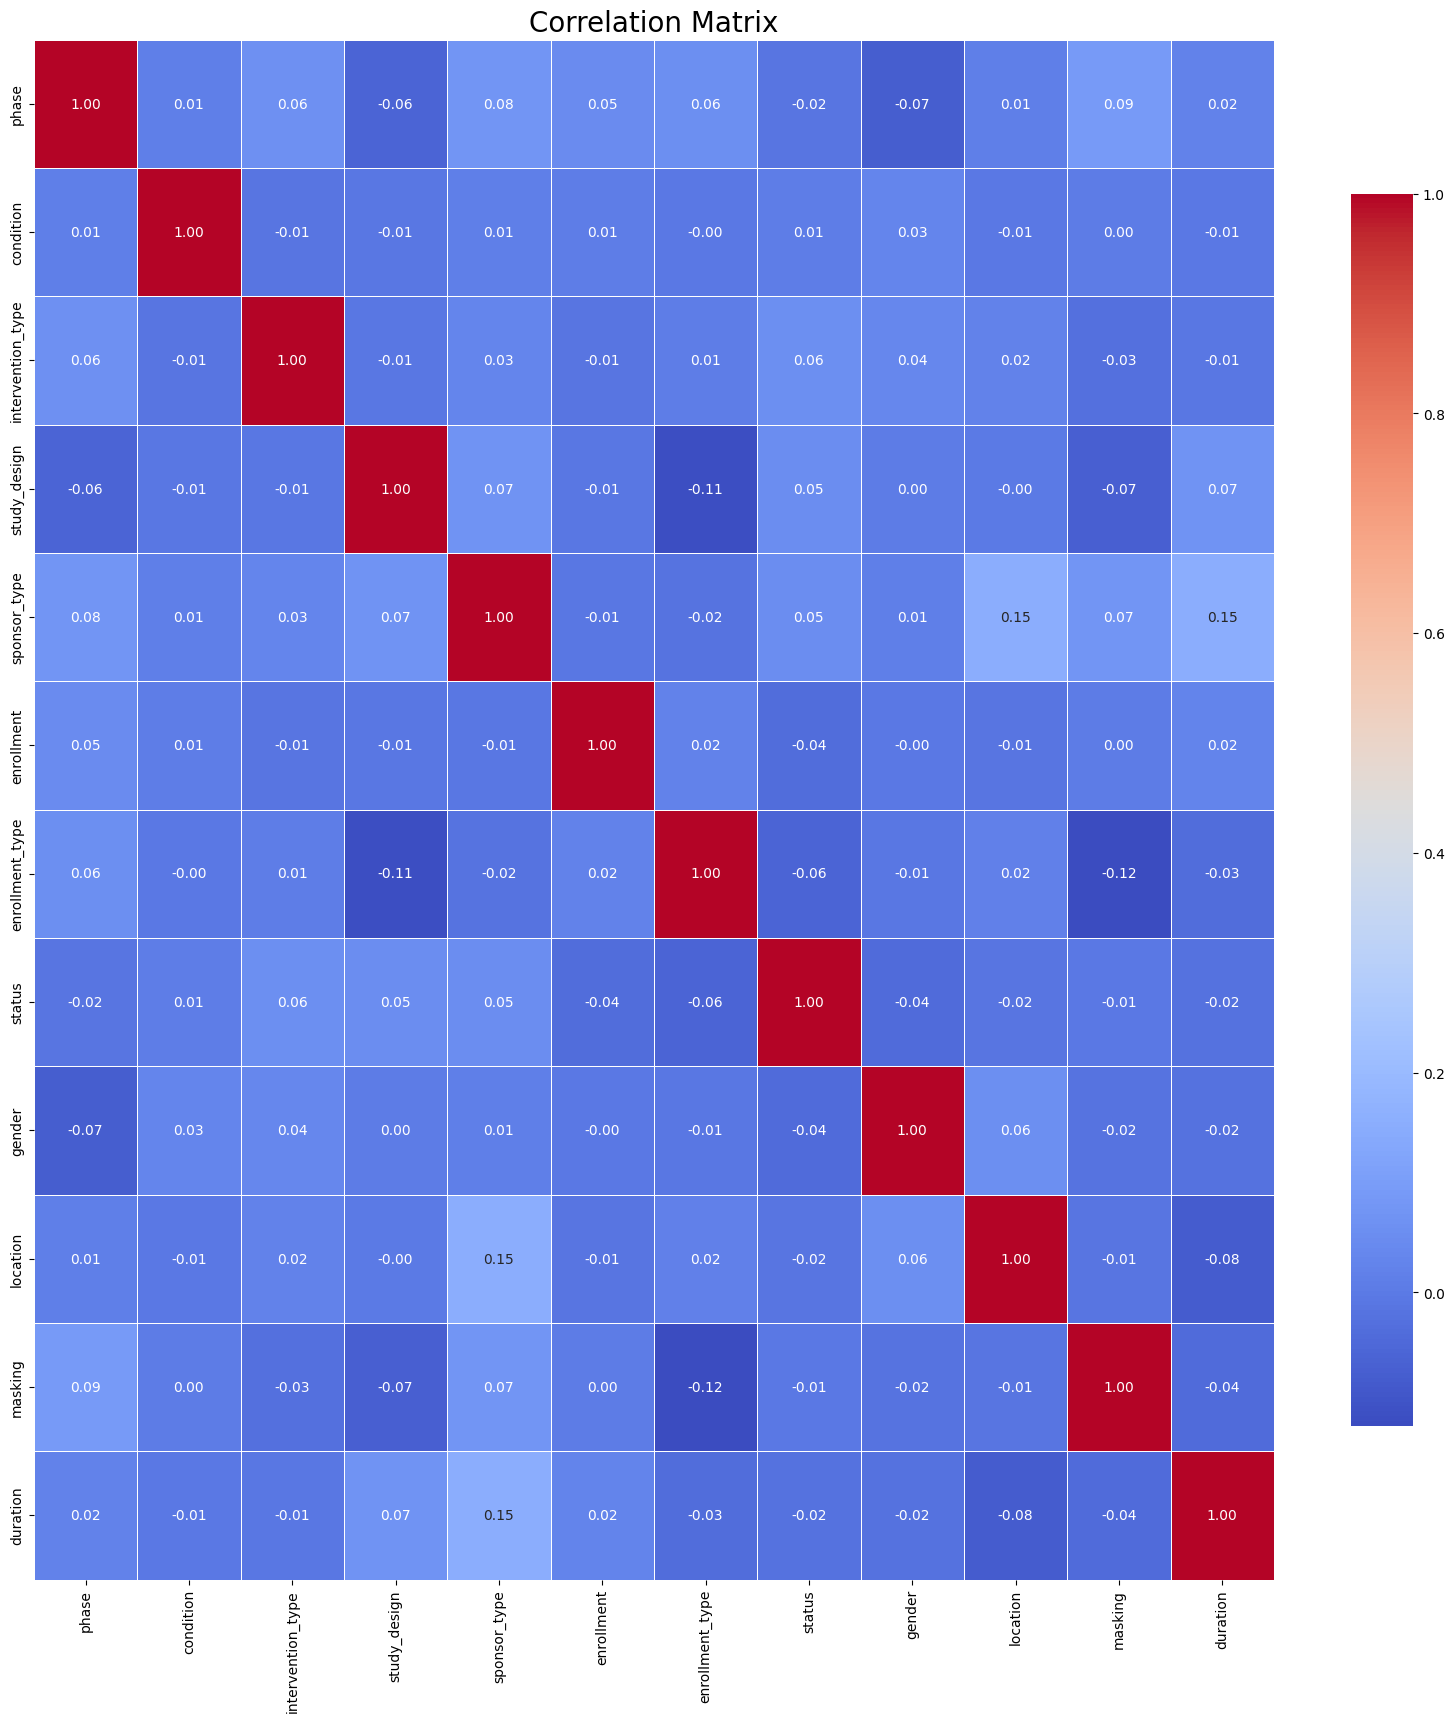

In [20]:
corr_df = pd.read_csv('Encoded_sampled.csv')
mat= corr_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(mat, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=20)
plt.show()

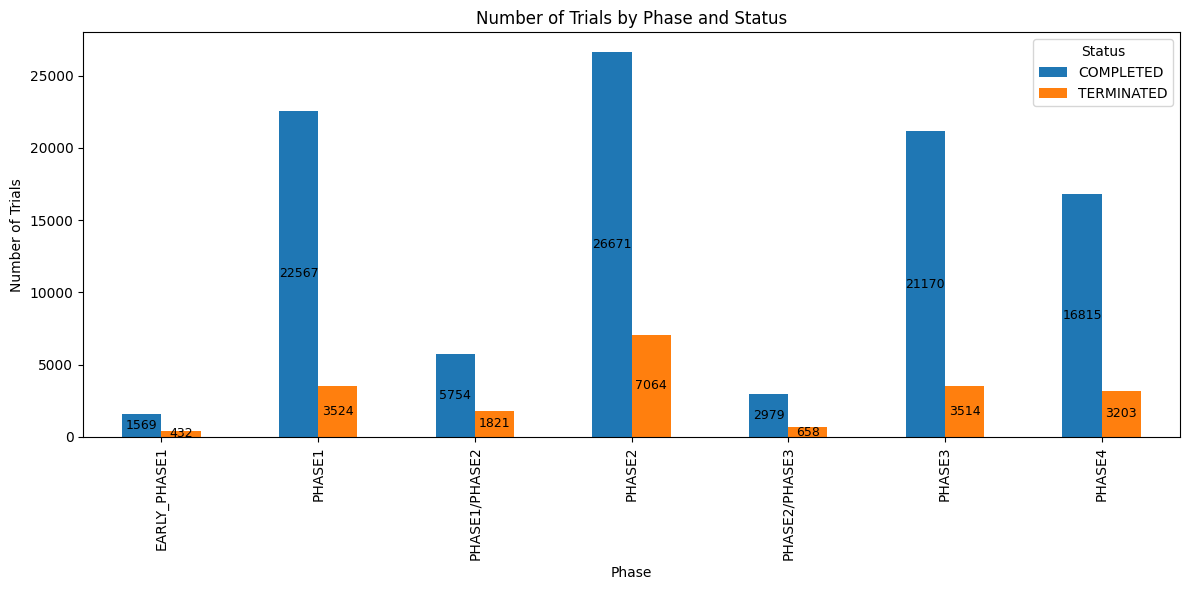

In [21]:
# Plot side by side bars (not stacked)
ax = phase_status_counts.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Number of Trials by Phase and Status')
plt.xlabel('Phase')
plt.ylabel('Number of Trials')
plt.legend(title='Status')

# Annotate bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()


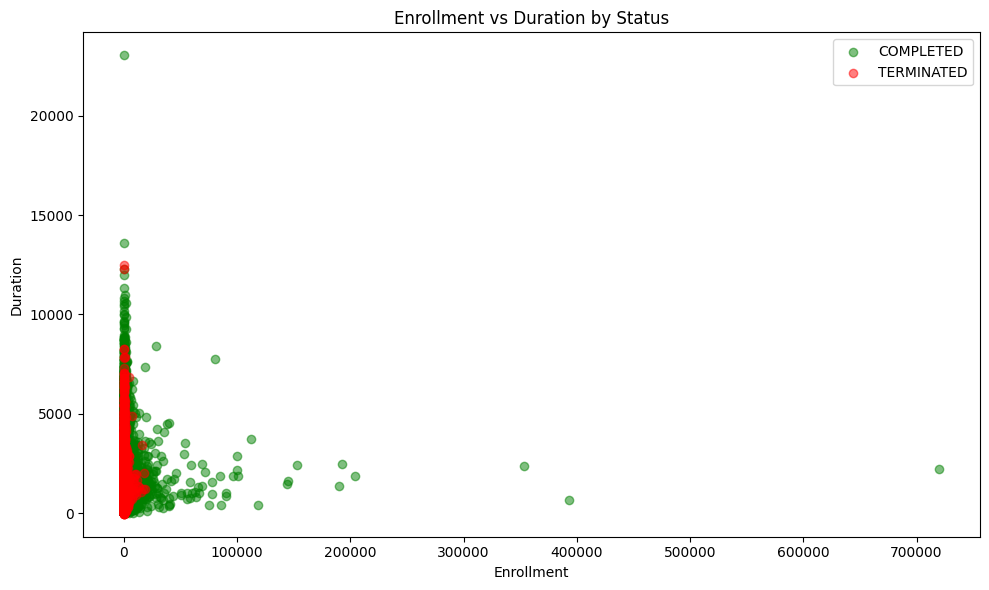

In [22]:
# Scatter plot: enrollment vs duration, colored by status
completed = df[df['status'] == 'COMPLETED']
terminated = df[df['status'] == 'TERMINATED']

plt.figure(figsize=(10, 6))
plt.scatter(completed['enrollment'], completed['duration'], color='green', alpha=0.5, label='COMPLETED')
plt.scatter(terminated['enrollment'], terminated['duration'], color='red', alpha=0.5, label='TERMINATED')
plt.xlabel('Enrollment')
plt.ylabel('Duration')
plt.title('Enrollment vs Duration by Status')
plt.legend()
plt.tight_layout()
plt.show()

status
COMPLETED     97525
TERMINATED    20216
Name: count, dtype: int64

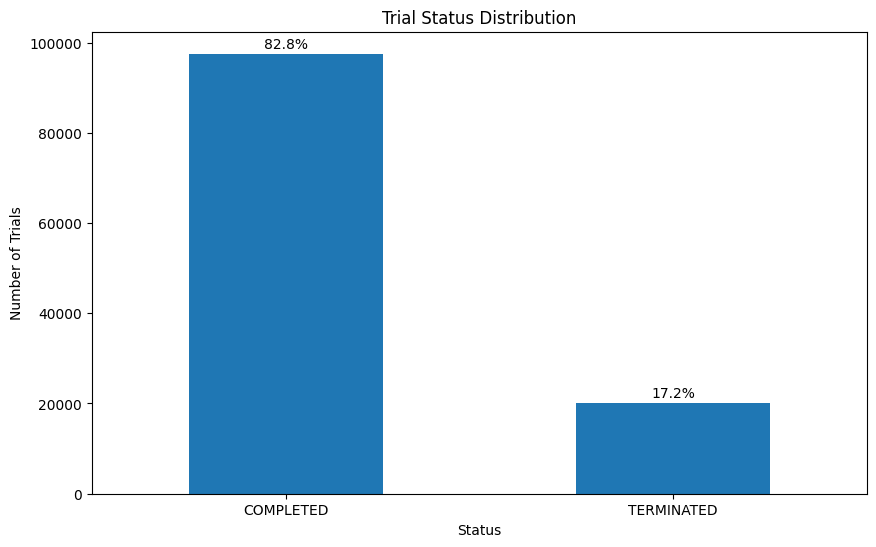

In [23]:
ax = df['status'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Trial Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Trials')
plt.xticks(rotation=0)

# Annotate bars with percentage contribution
total = df['status'].value_counts().sum()
for i, v in enumerate(df['status'].value_counts()):
    pct = v / total * 100
    ax.text(i, v + total * 0.01, f"{pct:.1f}%", ha='center', fontsize=10)

df['status'].value_counts()

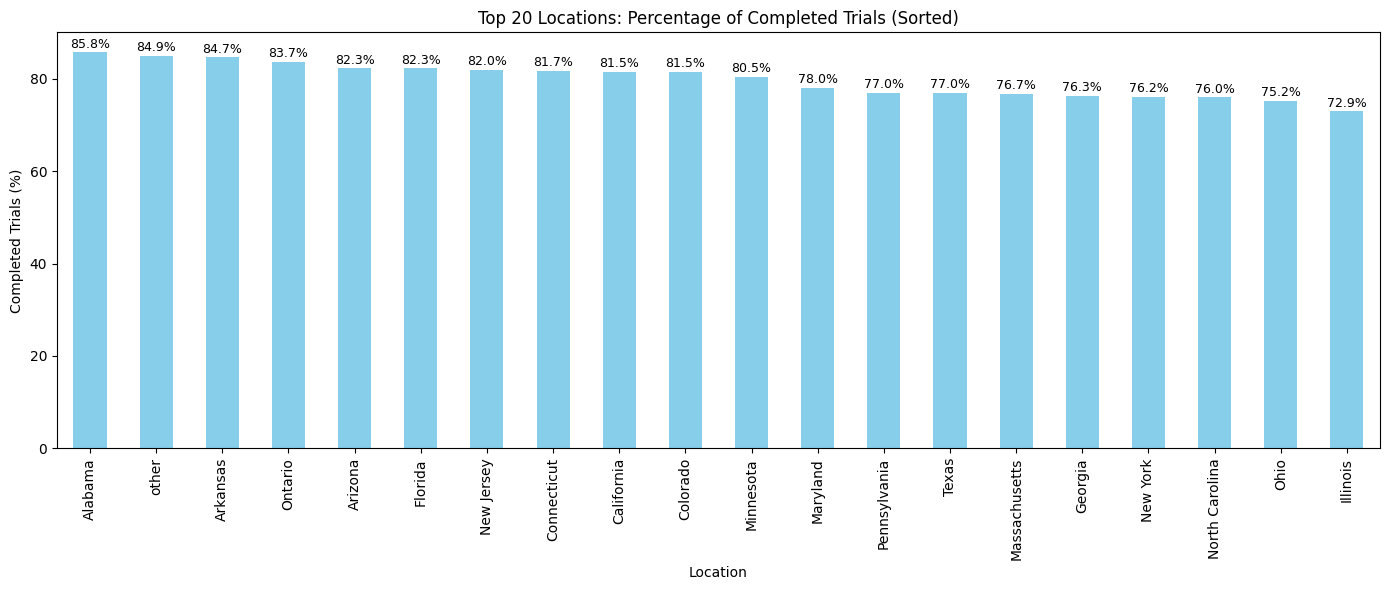

In [26]:
# Sort top20 by completed_pct
status_counts = df[df['status'].isin(['COMPLETED', 'TERMINATED'])] \
    .groupby(['location', 'status']).size().unstack(fill_value=0)

location_counts = status_counts.copy()
location_counts['completed_pct'] = location_counts['COMPLETED'] / (location_counts['COMPLETED'] + location_counts['TERMINATED']) * 100

top20 = location_counts.sort_values('COMPLETED', ascending=False).head(20)
top20_sorted = top20.sort_values('completed_pct', ascending=False)

# Plot bar graph
ax = top20_sorted['completed_pct'].plot(kind='bar', figsize=(14,6), color='skyblue')
plt.title('Top 20 Locations: Percentage of Completed Trials (Sorted)')
plt.ylabel('Completed Trials (%)')
plt.xlabel('Location')

# Annotate bars with percentage values
for i, v in enumerate(top20_sorted['completed_pct']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


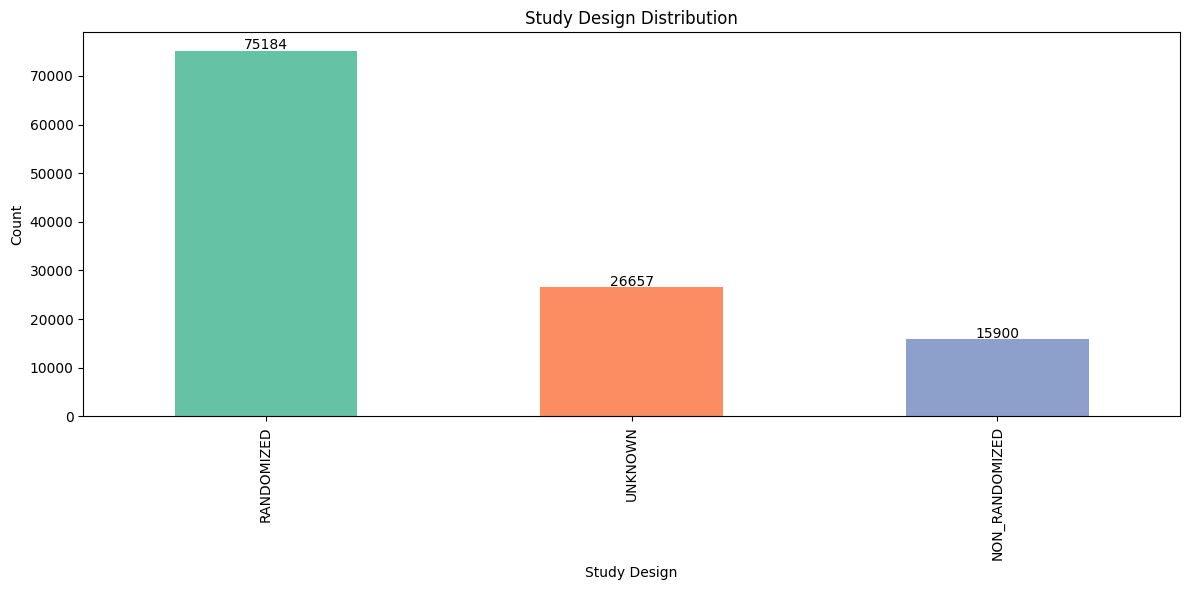

In [28]:
ax = df['study_design'].value_counts().plot(
    kind='bar', 
    figsize=(12,6), 
    color=sns.color_palette('Set2', n_colors=len(df['study_design'].value_counts()))
)
plt.title('Study Design Distribution')
plt.xlabel('Study Design')
plt.ylabel('Count')

# Annotate bars
for i, v in enumerate(df['study_design'].value_counts()):
    ax.text(i, v + total * 0.002, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

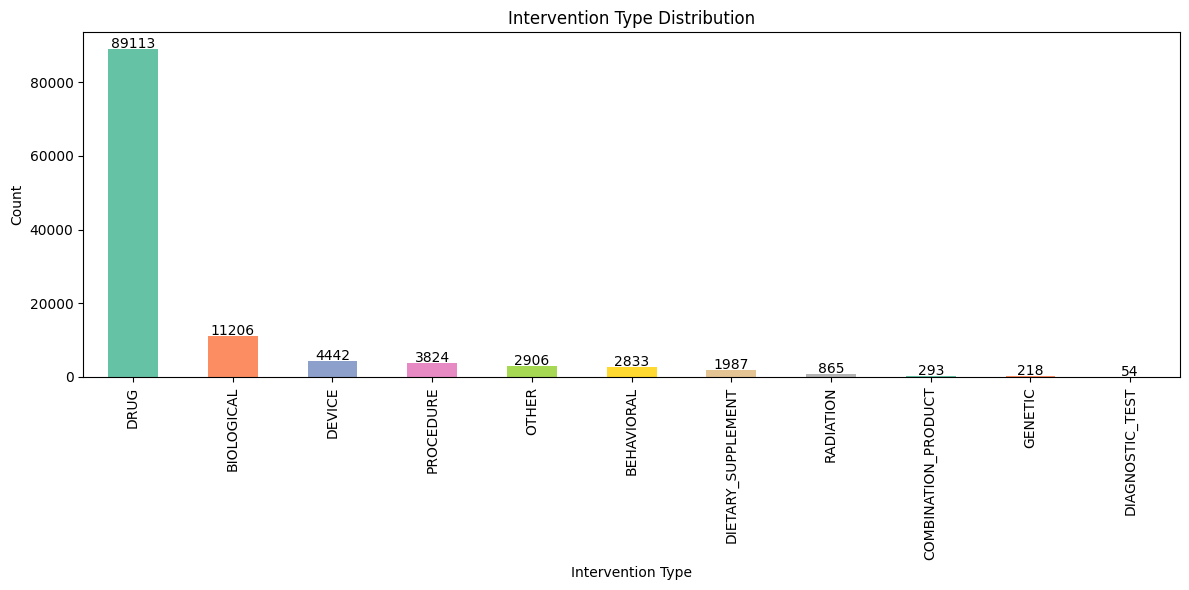

In [29]:
ax = df['intervention_type'].value_counts().plot(
    kind='bar',
    figsize=(12,6),
    color=sns.color_palette('Set2', n_colors=len(df['intervention_type'].value_counts()))
)
plt.title('Intervention Type Distribution')
plt.xlabel('Intervention Type')
plt.ylabel('Count')

# Annotate bars
for i, v in enumerate(df['intervention_type'].value_counts()):
    ax.text(i, v + total * 0.002, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()